✅ Получено 401 дней данных (из 200 запрошенных)
         Дата  Макс. температура (°C)  Мин. температура (°C)  \
0  2024-01-24                     8.8                   -2.5   
1  2024-01-25                    11.1                   -0.8   
2  2024-01-26                     2.2                   -4.7   
3  2024-01-27                     2.8                   -6.2   
4  2024-01-28                     4.5                   -5.3   
5  2024-01-29                     0.8                   -4.4   
6  2024-01-30                     1.0                   -1.6   
7  2024-01-31                    -1.8                   -6.7   
8  2024-02-01                    -2.3                   -8.4   
9  2024-02-02                    -3.2                   -7.5   

   Макс. скорость ветра (км/ч)  
0                         14.6  
1                         29.8  
2                         11.2  
3                          7.9  
4                          7.0  
5                          6.2  
6               

<Figure size 1200x600 with 0 Axes>

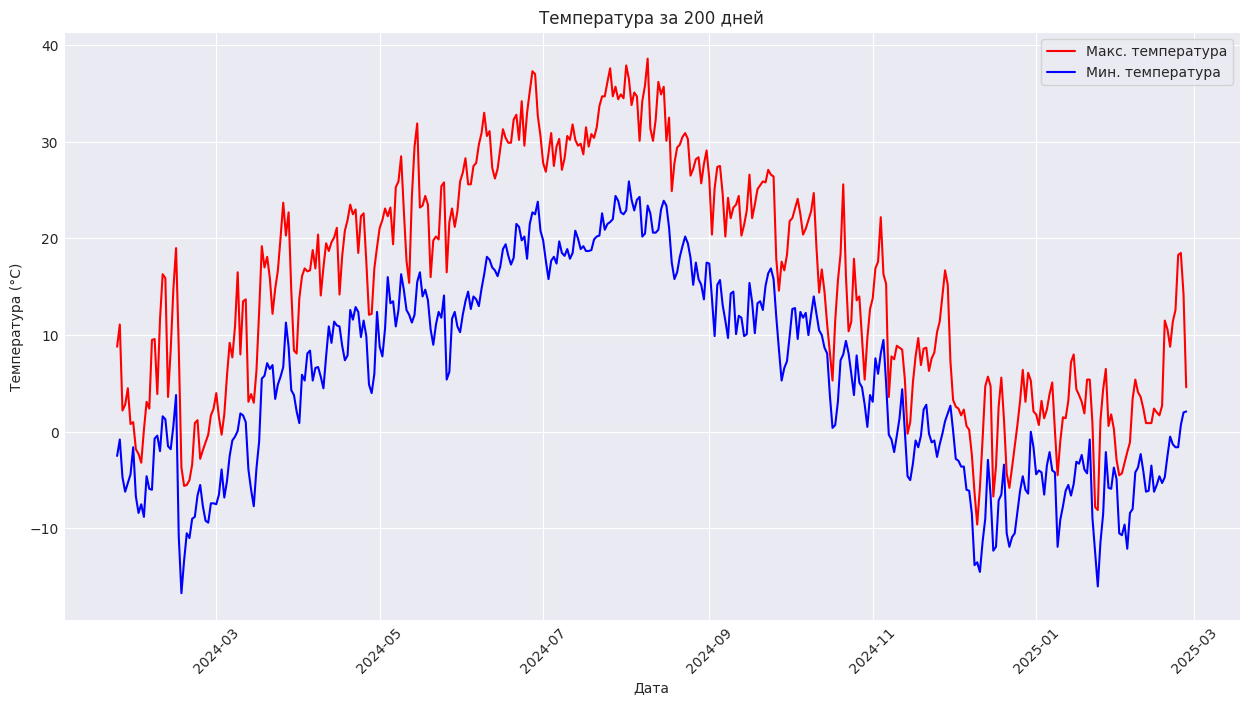

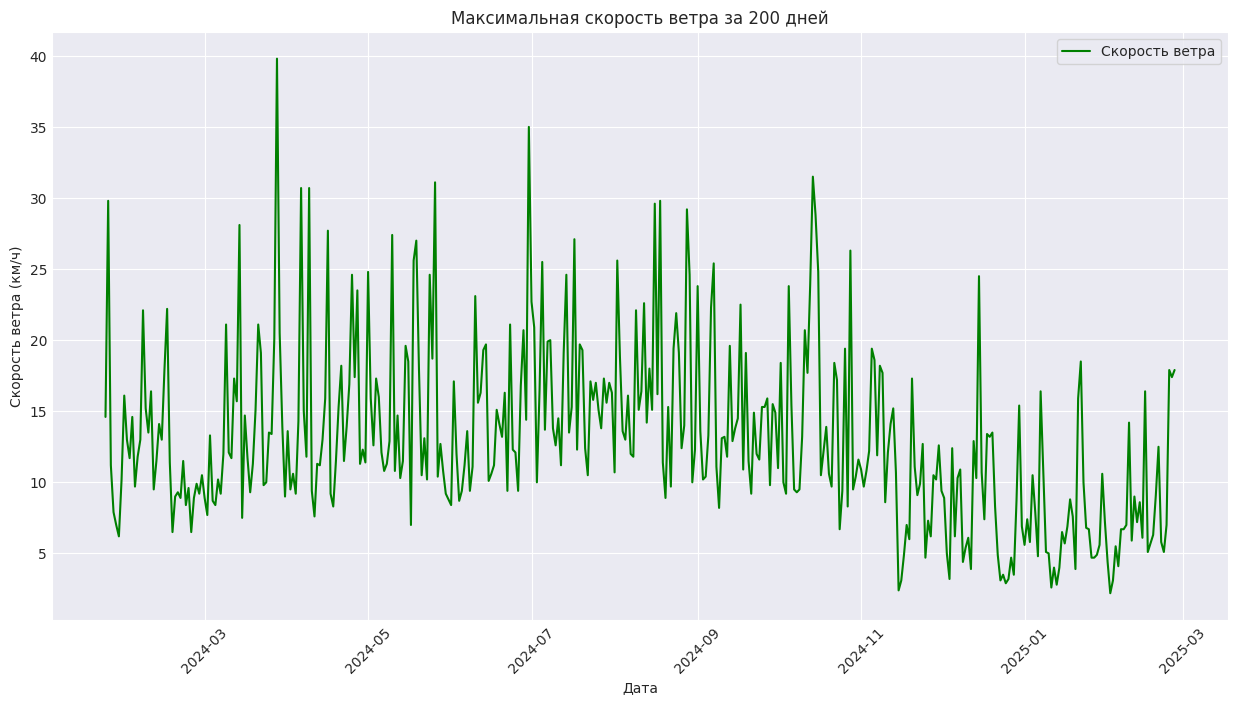

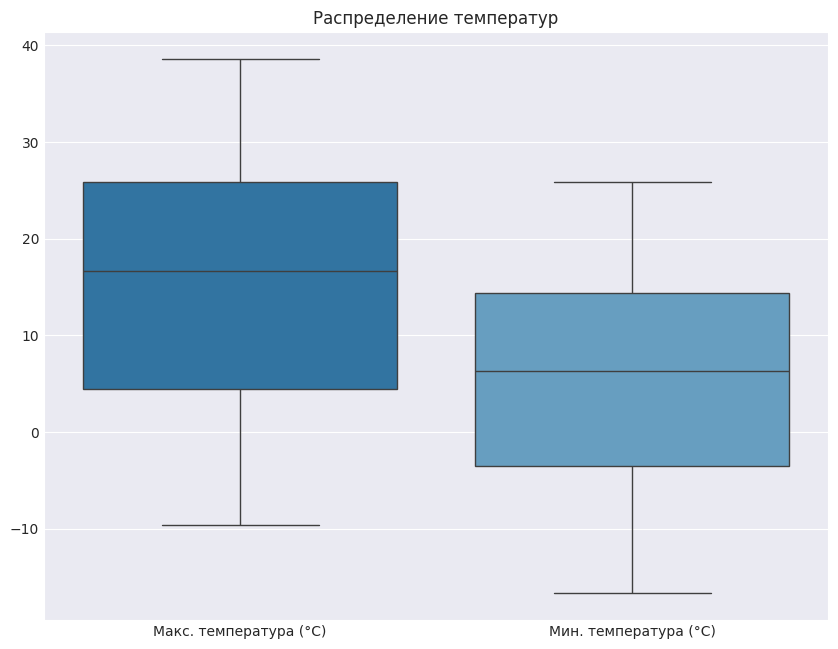

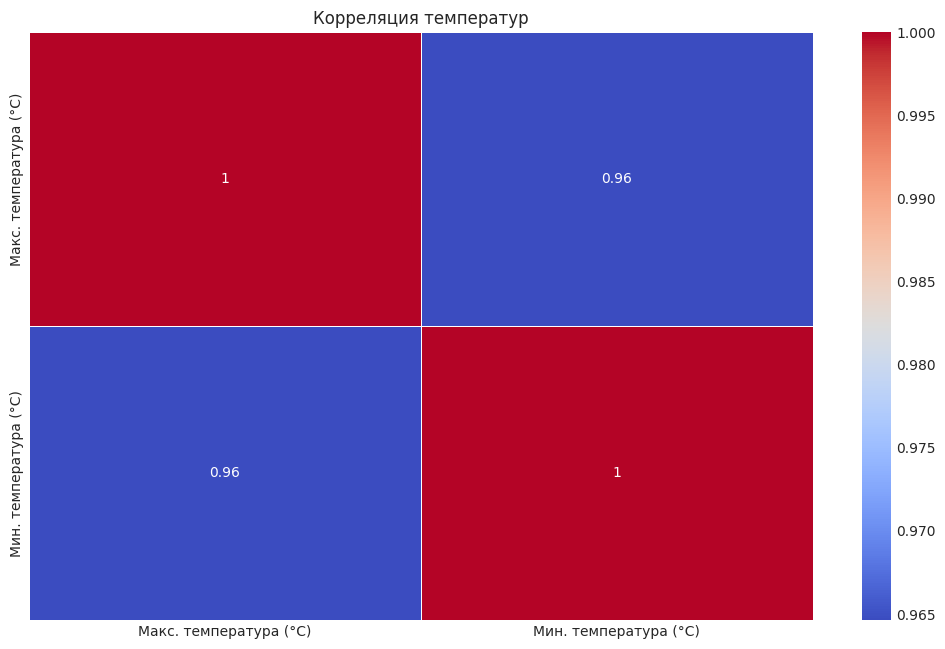

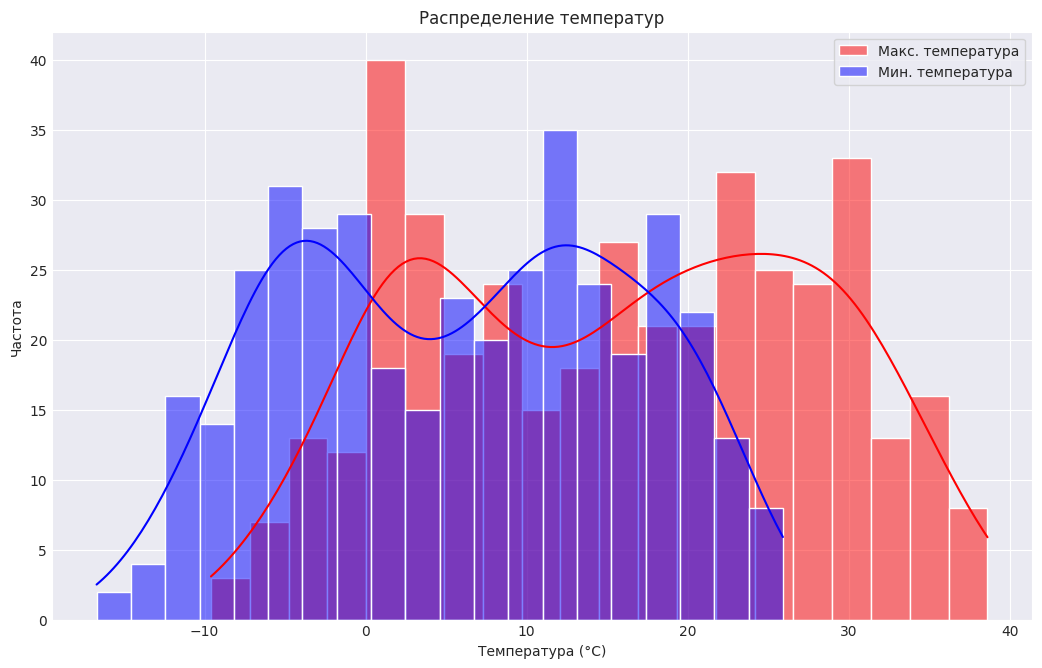

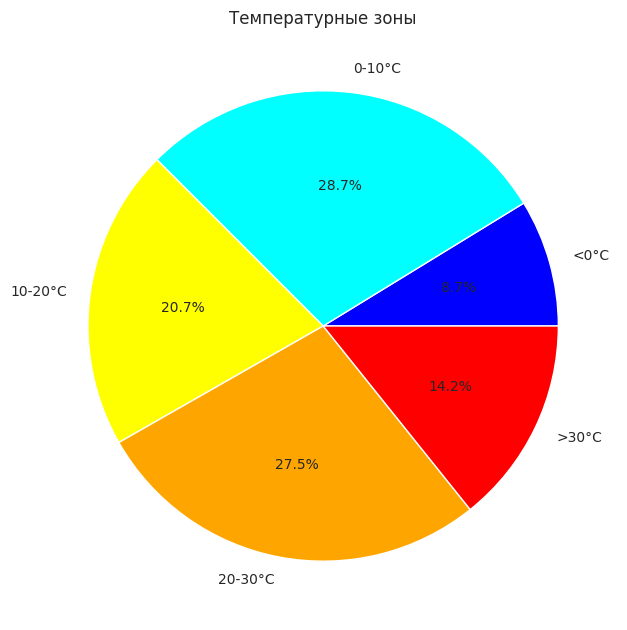

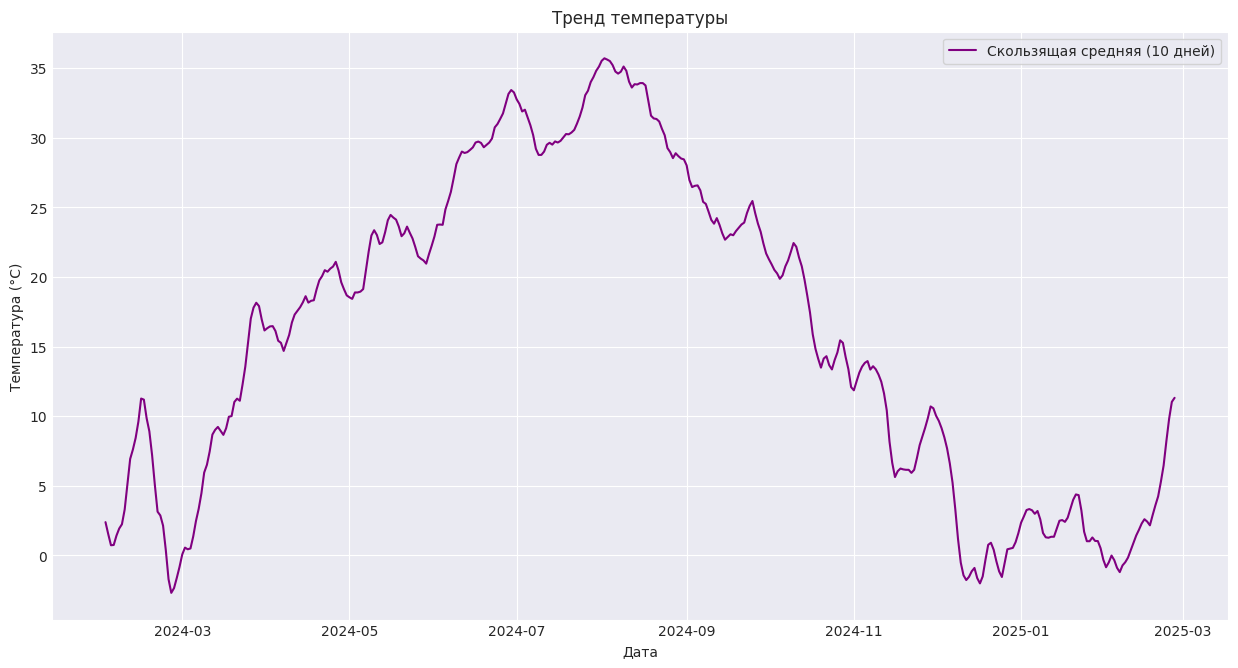

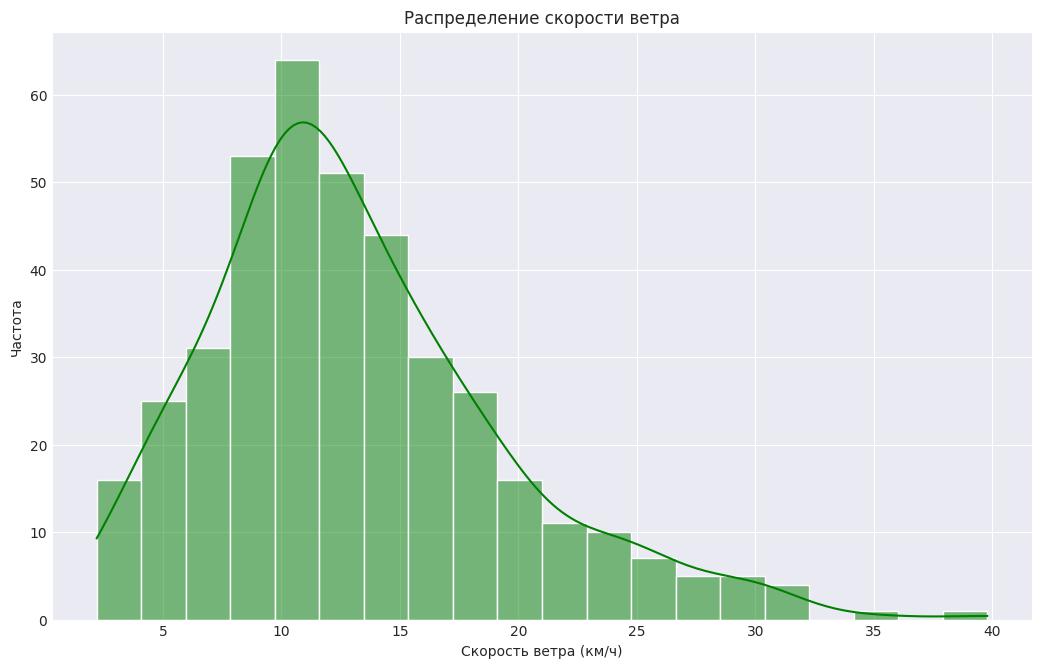

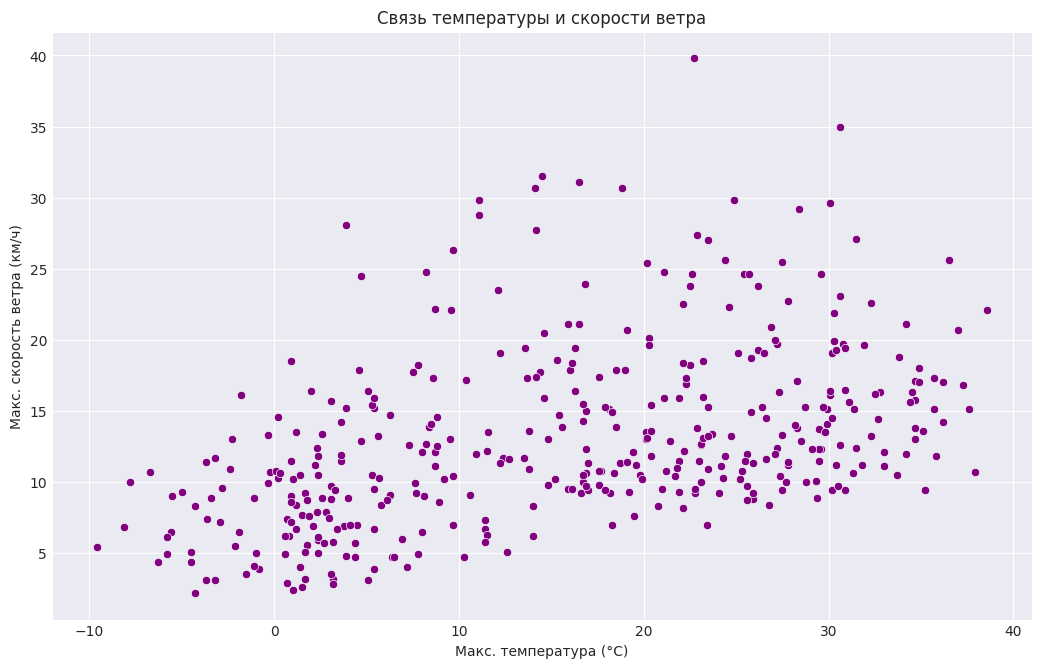

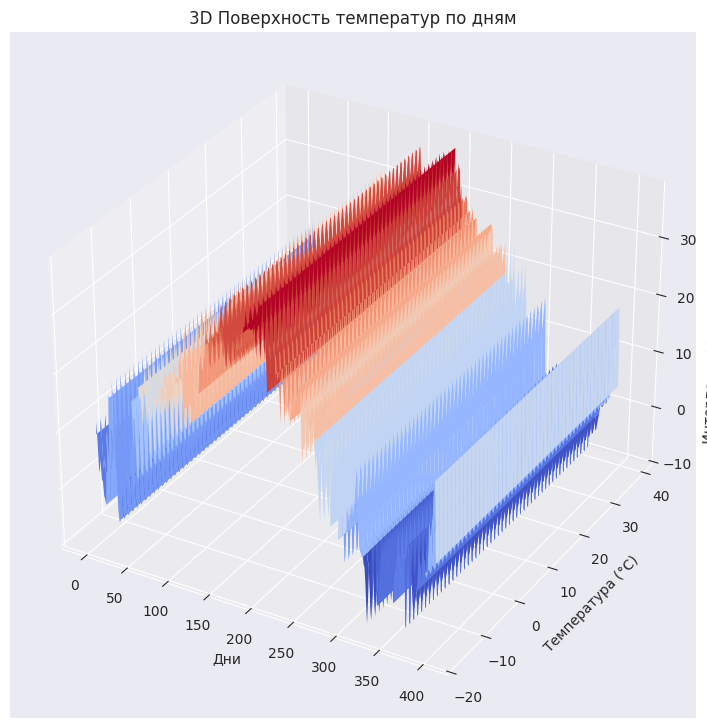

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta

latitude = 42.8746
longitude = 74.5698

days_back = 400

end_date = datetime.now().date()
start_date = end_date - timedelta(days=days_back)

url = (
    f"https://archive-api.open-meteo.com/v1/archive?"
    f"latitude={latitude}&longitude={longitude}"
    f"&start_date={start_date}&end_date={end_date}"
    f"&daily=temperature_2m_max,temperature_2m_min,wind_speed_10m_max"
    f"&timezone=Asia/Bishkek"
)

response = requests.get(url)

if response.status_code == 200:
    data = response.json()

    if "daily" in data:
        dates = data["daily"]["time"]
        temp_max = data["daily"]["temperature_2m_max"]
        temp_min = data["daily"]["temperature_2m_min"]
        wind_speed = data["daily"]["wind_speed_10m_max"]

        df = pd.DataFrame({
            "Дата": dates,
            "Макс. температура (°C)": temp_max,
            "Мин. температура (°C)": temp_min,
            "Макс. скорость ветра (км/ч)": wind_speed
        })

        print(f" Получено {len(df)} дней данных (из 200 запрошенных)")
        print(df.head(10))  # Показываем первые 10 строк

        df.to_csv("bishkek_weather_200_days.csv", index=False)
        print(" Данные сохранены в 'bishkek_weather_200_days.csv'!")
    else:
        print(" Данные недоступны. Возможно, для этой даты их нет.")
else:
    print(" Ошибка при получении данных! Код ошибки:", response.status_code)





import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("bishkek_weather_200_days.csv")

df["Дата"] = pd.to_datetime(df["Дата"])

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))

plt.figure(figsize=(12, 6))
plt.plot(df["Дата"], df["Макс. температура (°C)"], label="Макс. температура", color="red")
plt.plot(df["Дата"], df["Мин. температура (°C)"], label="Мин. температура", color="blue")
plt.xlabel("Дата")
plt.ylabel("Температура (°C)")
plt.title("Температура за 200 дней")
plt.legend()
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df["Дата"], df["Макс. скорость ветра (км/ч)"], label="Скорость ветра", color="green")
plt.xlabel("Дата")
plt.ylabel("Скорость ветра (км/ч)")
plt.title("Максимальная скорость ветра за 200 дней")
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[["Макс. температура (°C)", "Мин. температура (°C)"]])
plt.title("Распределение температур")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df[["Макс. температура (°C)", "Мин. температура (°C)"]].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Корреляция температур")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df["Макс. температура (°C)"], bins=20, kde=True, color="red", label="Макс. температура")
sns.histplot(df["Мин. температура (°C)"], bins=20, kde=True, color="blue", label="Мин. температура")
plt.xlabel("Температура (°C)")
plt.ylabel("Частота")
plt.title("Распределение температур")
plt.legend()
plt.show()

temp_ranges = ["<0°C", "0-10°C", "10-20°C", "20-30°C", ">30°C"]
temp_counts = [
    sum(df["Макс. температура (°C)"] < 0),
    sum((df["Макс. температура (°C)"] >= 0) & (df["Макс. температура (°C)"] < 10)),
    sum((df["Макс. температура (°C)"] >= 10) & (df["Макс. температура (°C)"] < 20)),
    sum((df["Макс. температура (°C)"] >= 20) & (df["Макс. температура (°C)"] < 30)),
    sum(df["Макс. температура (°C)"] >= 30)
]
plt.figure(figsize=(8, 6))
plt.pie(temp_counts, labels=temp_ranges, autopct="%1.1f%%", colors=["blue", "cyan", "yellow", "orange", "red"])
plt.title("Температурные зоны")
plt.show()

df["Средняя температура"] = df["Макс. температура (°C)"].rolling(window=10).mean()
plt.figure(figsize=(12, 6))
plt.plot(df["Дата"], df["Средняя температура"], label="Скользящая средняя (10 дней)", color="purple")
plt.xlabel("Дата")
plt.ylabel("Температура (°C)")
plt.title("Тренд температуры")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df["Макс. скорость ветра (км/ч)"], bins=20, kde=True, color="green")
plt.xlabel("Скорость ветра (км/ч)")
plt.ylabel("Частота")
plt.title("Распределение скорости ветра")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Макс. температура (°C)"], y=df["Макс. скорость ветра (км/ч)"], color="purple")
plt.xlabel("Макс. температура (°C)")
plt.ylabel("Макс. скорость ветра (км/ч)")
plt.title("Связь температуры и скорости ветра")



import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


df["Дата_число"] = (df["Дата"] - df["Дата"].min()).dt.days


X, Y = np.meshgrid(df["Дата_число"], np.linspace(df["Мин. температура (°C)"].min(), df["Макс. температура (°C)"].max(), 50))


Z = np.interp(X, df["Дата_число"], df["Макс. температура (°C)"])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 7))
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, edgecolor='none')

ax.set_xlabel("Дни")
ax.set_ylabel("Температура (°C)")
ax.set_zlabel("Интерполированная температура")
ax.set_title("3D Поверхность температур по дням")

plt.show()






